# New Section

In [1]:
import requests
import pandas as pd
import time

def fetch_binance_data(symbol="BTCUSDT", interval="1d", start_year=2017):
    base_url = "https://api.binance.com/api/v3/klines"
    end_time = int(time.time() * 1000)  # Current time in milliseconds
    start_time = int(time.mktime(time.strptime(f"{start_year}-01-01", "%Y-%m-%d"))) * 1000  # Start time in ms

    all_data = []
    limit = 1000  # Maximum rows per request

    while start_time < end_time:
        # Fetch data from Binance
        params = {
            "symbol": symbol,
            "interval": interval,
            "startTime": start_time,
            "limit": limit,
        }
        response = requests.get(base_url, params=params)

        if response.status_code == 200:
            data = response.json()
            if not data:
                break
            all_data.extend(data)

            # Update the start_time to the last retrieved timestamp
            start_time = data[-1][0] + 1
        else:
            print(f"Error fetching data: {response.status_code}, {response.text}")
            break

    # Convert data to a DataFrame
    columns = [
        "timestamp", "open", "high", "low", "close", "volume",
        "close_time", "quote_asset_volume", "number_of_trades",
        "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
    ]
    df = pd.DataFrame(all_data, columns=columns)

    # Convert data types
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
    numeric_columns = ["open", "high", "low", "close", "volume", "quote_asset_volume",
                       "number_of_trades", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume"]
    df[numeric_columns] = df[numeric_columns].astype(float)

    return df

# Fetch last 6 years of daily BTC-USD data
df = fetch_binance_data(symbol="BTCUSDT", interval="1d", start_year=2017)

# Display the DataFrame
print(df.head())


Error fetching data: 451, {
  "code": 0,
  "msg": "Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error."
}
Empty DataFrame
Columns: [timestamp, open, high, low, close, volume, close_time, quote_asset_volume, number_of_trades, taker_buy_base_asset_volume, taker_buy_quote_asset_volume, ignore]
Index: []


In [2]:
print(df.tail())

      timestamp      open       high       low      close         volume  \
2665 2024-12-03  95840.61   96305.52  93578.17   95849.69   35827.322830   
2666 2024-12-04  95849.69   99000.00  94587.83   98587.32   43850.537280   
2667 2024-12-05  98587.32  104088.00  90500.00   96945.63  109921.729662   
2668 2024-12-06  96945.63  101898.99  95981.72   99740.84   45049.533100   
2669 2024-12-07  99740.84  100428.00  98844.00  100178.33   12426.733940   

         close_time  quote_asset_volume  number_of_trades  \
2665  1733270399999        3.413996e+09         5361712.0   
2666  1733356799999        4.241995e+09         6648724.0   
2667  1733443199999        1.104800e+10        12012364.0   
2668  1733529599999        4.456642e+09         6919102.0   
2669  1733615999999        1.237353e+09         2136967.0   

      taker_buy_base_asset_volume  taker_buy_quote_asset_volume ignore  
2665                 17339.111670                  1.652091e+09      0  
2666                 22033.601

In [3]:
print('Dataset Shape:', df.shape)

Dataset Shape: (2670, 12)


In [4]:
# Check the data types of each column
print('Data Types:', df.dtypes)

Data Types: timestamp                       datetime64[ns]
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
close_time                               int64
quote_asset_volume                     float64
number_of_trades                       float64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
ignore                                  object
dtype: object


In [5]:
# Summary statistics
print('Summary Statistics:')
print(df.describe())

Summary Statistics:
                 timestamp          open           high           low  \
count                 2670   2670.000000    2670.000000   2670.000000   
mean   2021-04-12 12:00:00  26349.739423   26996.057685  25664.488169   
min    2017-08-17 00:00:00   3188.010000    3276.500000   2817.000000   
25%    2019-06-15 06:00:00   8479.265000    8731.195000   8154.750000   
50%    2021-04-12 12:00:00  19955.825000   20376.820000  19413.110000   
75%    2023-02-08 18:00:00  41484.745000   42423.052500  40420.955000   
max    2024-12-07 00:00:00  99740.840000  104088.000000  98844.000000   
std                    NaN  21038.140774   21521.266243  20559.787382   

               close         volume    close_time  quote_asset_volume  \
count    2670.000000    2670.000000  2.670000e+03        2.670000e+03   
mean    26385.718236   68448.992996  1.618315e+12        1.709345e+09   
min      3189.020000     228.108068  1.503014e+12        9.778657e+05   
25%      8491.550000   28380.8

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing Values:')
print(missing_values)

Missing Values:
timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64


In [7]:
print(df.dtypes)


timestamp                       datetime64[ns]
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
close_time                               int64
quote_asset_volume                     float64
number_of_trades                       float64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
ignore                                  object
dtype: object


In [8]:
# Ensure 'timestamp' is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Drop non-numeric columns (like 'ignore')
df_numeric = df.drop(columns=['ignore'])

# Resample to daily frequency
df_daily = df_numeric.resample('D', on='timestamp').mean()

# Resample to monthly frequency
df_monthly = df_numeric.resample('M', on='timestamp').mean()

# Resample to annual frequency
df_annual = df_numeric.resample('A-DEC', on='timestamp').mean()

# Resample to quarterly frequency
df_quarterly = df_numeric.resample('Q-DEC', on='timestamp').mean()

# Display results
print(df_daily.head())


               open     high      low    close       volume    close_time  \
timestamp                                                                   
2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377  1.503014e+12   
2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264  1.503101e+12   
2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763  1.503187e+12   
2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022  1.503274e+12   
2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060  1.503360e+12   

            quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
timestamp                                                                       
2017-08-17        3.454770e+06            3427.0                   616.248541   
2017-08-18        5.086958e+06            5233.0                   972.868710   
2017-08-19        1.549484e+06            2153.0                   274.336042   
2017-08-20        1.930364e+06            2321.0       

<ipython-input-8-8542a26955a5>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_numeric.resample('M', on='timestamp').mean()
<ipython-input-8-8542a26955a5>:14: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'YE-DEC' instead.
  df_annual = df_numeric.resample('A-DEC', on='timestamp').mean()
<ipython-input-8-8542a26955a5>:17: FutureWarning: 'Q-DEC' is deprecated and will be removed in a future version, please use 'QE-DEC' instead.
  df_quarterly = df_numeric.resample('Q-DEC', on='timestamp').mean()


In [9]:
# Handling missing values in df_daily
df_daily = df_daily.fillna(df_daily.mean())

# Handling missing values in df_monthly
df_monthly = df_monthly.fillna(df_monthly.mean())

# Handling missing values in df_annual
df_annual = df_annual.fillna(df_annual.mean())

# Handling missing values in df_quarterly
df_quarterly = df_quarterly.fillna(df_quarterly.mean())

In [10]:
# Calculate the daily percentage change in Bitcoin price
df_daily['Price_Pct_Change'] = df_daily['close'].pct_change()

# Calculate 3-month moving average for df_monthly
df_monthly['Moving_Average_3M'] = df_monthly['close'].rolling(window=3).mean()

# Calculate 6-month moving average for df_monthly
df_monthly['Moving_Average_6M'] = df_monthly['close'].rolling(window=6).mean()

# Calculate 12-month moving average for df_annual
df_annual['Moving_Average_12M'] = df_annual['close'].rolling(window=12).mean()

# Calculate 3-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_3M'] = df_quarterly['close'].rolling(window=3).std()

# Calculate 6-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_6M'] = df_quarterly['close'].rolling(window=6).std()

In [11]:
df.tail()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
2665,2024-12-03,95840.61,96305.52,93578.17,95849.69,35827.322830,1733270399999,3.413996e+09,5361712.0,17339.111670,1.652091e+09,0
2666,2024-12-04,95849.69,99000.00,94587.83,98587.32,43850.537280,1733356799999,4.241995e+09,6648724.0,22033.601120,2.132656e+09,0
2667,2024-12-05,98587.32,104088.00,90500.00,96945.63,109921.729662,1733443199999,1.104800e+10,12012364.0,56235.078356,5.657171e+09,0
2668,2024-12-06,96945.63,101898.99,95981.72,99740.84,45049.533100,1733529599999,4.456642e+09,6919102.0,21999.624160,2.175646e+09,0
2669,2024-12-07,99740.84,100428.00,98844.00,100178.33,12426.733940,1733615999999,1.237353e+09,2136967.0,5624.135320,5.600733e+08,0


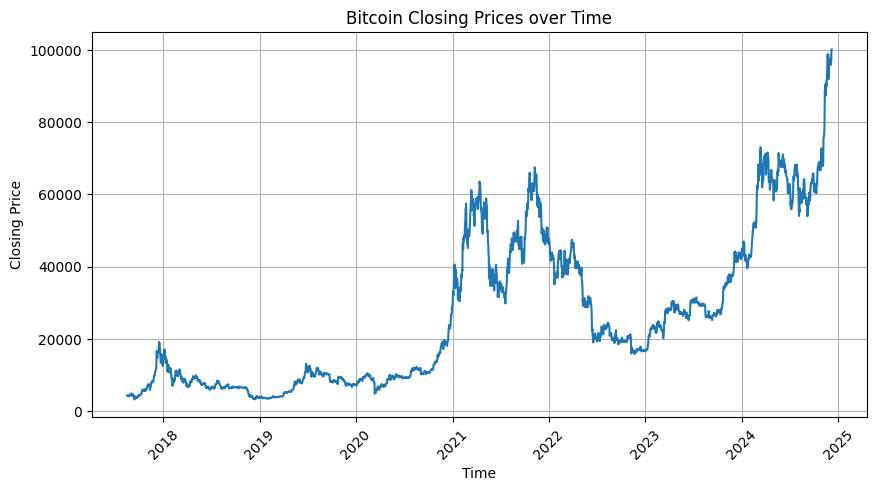

In [12]:
import matplotlib.pyplot as plt

# Convert Unix time to datetime
# df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Set the Timestamp column as the index
df.set_index('timestamp', inplace=True)

# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

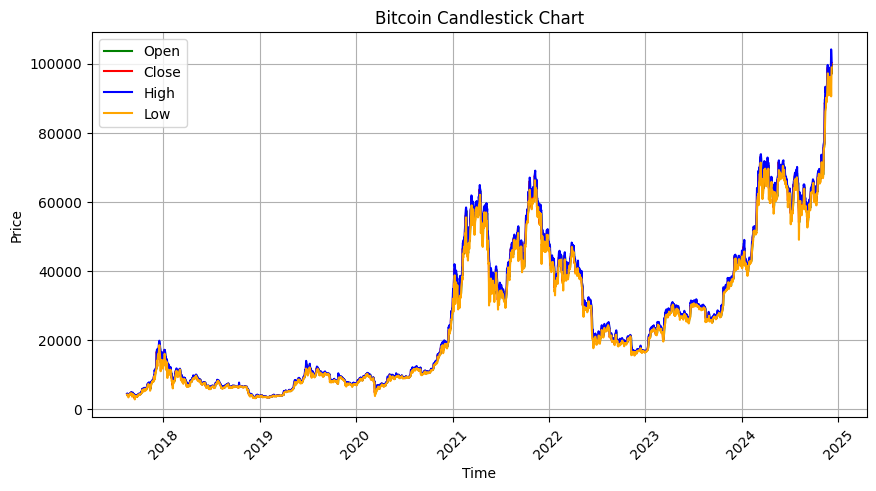

In [13]:
# Plot 2: Candlestick chart of Bitcoin prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['open'], color='green', label='Open')
plt.plot(df.index, df['close'], color='red', label='Close')
plt.plot(df.index, df['high'], color='blue', label='High')
plt.plot(df.index, df['low'], color='orange', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Model Selection

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [15]:
from prophet import Prophet
import numpy as np

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp690y58b6/yf8b2yvr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp690y58b6/lno1h4aw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35289', 'data', 'file=/tmp/tmp690y58b6/yf8b2yvr.json', 'init=/tmp/tmp690y58b6/lno1h4aw.json', 'output', 'file=/tmp/tmp690y58b6/prophet_modelpe9jl08r/prophet_model-20241207190209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:02:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:02:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 45578.60204348734


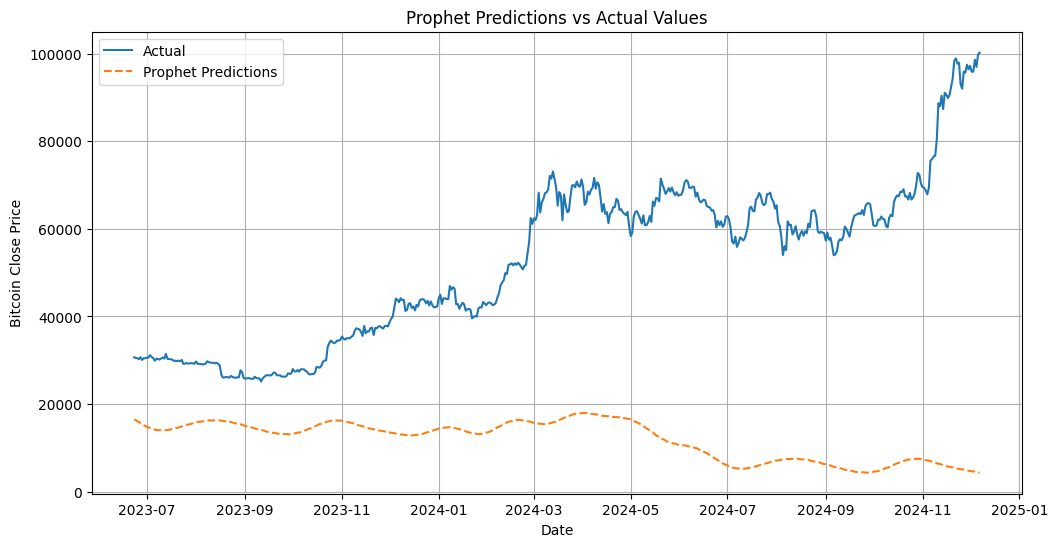

In [16]:
# Prepare data for Prophet
prophet_data = df_daily[['close']].reset_index()  # Reset index to access datetime
prophet_data.columns = ['ds', 'y']  # Rename columns for Prophet

# Train-test split for Prophet
train_size = int(len(prophet_data) * 0.8)
prophet_train = prophet_data[:train_size]
prophet_test = prophet_data[train_size:]

# Initialize and train Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_train)

# Create future DataFrame for predictions
future = prophet_model.make_future_dataframe(periods=len(prophet_test), freq='D')

# Generate predictions
prophet_forecast = prophet_model.predict(future)

# Extract predictions for the test period
prophet_predictions = prophet_forecast[['ds', 'yhat']].iloc[-len(prophet_test):]

# Calculate RMSE for Prophet
prophet_rmse = np.sqrt(mean_squared_error(prophet_test['y'], prophet_predictions['yhat']))
print(f"Prophet RMSE: {prophet_rmse}")

# Visualize predictions vs actuals
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(prophet_test['ds'], prophet_test['y'], label='Actual')
plt.plot(prophet_predictions['ds'], prophet_predictions['yhat'], label='Prophet Predictions', linestyle='dashed')
plt.title('Prophet Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Bitcoin Close Price')
plt.legend()
plt.grid(True)
plt.show()


Scaled data for other models

In [17]:
# Split data into train and test sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]
print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

Train Data Shape: (2136, 11)
Test Data Shape: (534, 11)


In [18]:
# Confirm the data range used for training
print(train_data.tail())  # Should match the latest rows of your full dataset




                open      high       low     close        volume  \
timestamp                                                          
2023-06-18  26516.99  26700.00  26255.85  26339.97   21538.31022   
2023-06-19  26339.98  27068.09  26256.61  26844.35   35872.65974   
2023-06-20  26844.35  28402.74  26652.00  28307.99   69666.95525   
2023-06-21  28308.00  30800.00  28257.99  29993.89  108926.40412   
2023-06-22  29993.89  30500.00  29525.61  29884.92   59054.56460   

              close_time  quote_asset_volume  number_of_trades  \
timestamp                                                        
2023-06-18  1.687133e+12        5.710130e+08          555956.0   
2023-06-19  1.687219e+12        9.541940e+08          732735.0   
2023-06-20  1.687306e+12        1.912798e+09         1189024.0   
2023-06-21  1.687392e+12        3.210301e+09         1872873.0   
2023-06-22  1.687478e+12        1.775822e+09         1146092.0   

            taker_buy_base_asset_volume  taker_buy_quote_ass

In [19]:
# Fetch recent data (example with Binance API)
recent_data = fetch_binance_data(symbol="BTCUSDT", interval="1d", start_year=2023)

# Append the new data to the training dataset
train_data = pd.concat([train_data, recent_data]).drop_duplicates()



In [20]:
# ARIMA model
arima_model = ARIMA(train_data['close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [21]:
# SARIMA model
sarima_model = SARIMAX(train_data['close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [22]:
# Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['close'])
gbr_predictions = gbr_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))

In [23]:
print(train_data.dtypes)

open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
close_time                             float64
quote_asset_volume                     float64
number_of_trades                       float64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
Price_Pct_Change                       float64
timestamp                       datetime64[ns]
ignore                                  object
dtype: object


In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Select only numeric columns from train_data and test_data
numeric_columns = train_data.select_dtypes(include=[np.number])
train_data_cleaned = numeric_columns.dropna()  # Drop rows with NaN values

numeric_columns_test = test_data.select_dtypes(include=[np.number])
test_data_cleaned = numeric_columns_test.dropna()  # Drop rows with NaN values

# Reshape data for LSTM (samples, timesteps, features)
train_data_reshaped = np.expand_dims(train_data_cleaned.values, axis=-1)
test_data_reshaped = np.expand_dims(test_data_cleaned.values, axis=-1)

# Define LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(train_data_reshaped.shape[1], 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create and train the LSTM model
lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(
    train_data_reshaped,
    train_data_reshaped,
    epochs=10,
    batch_size=1,
    verbose=1
)

# Make predictions
lstm_predictions = lstm_model.predict(test_data_reshaped)

# Print predictions
print("Predictions:", lstm_predictions[:5])


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2135/2135 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 231449460424185776963584.0000
Epoch 2/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 232151175289325628686336.0000
Epoch 3/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 231495793457152164626432.0000
Epoch 4/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 231708633575541694267392.0000
Epoch 5/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 231991423603343542452224.0000
Epoch 6/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 232251227258647291625472.0000
Epoch 7/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 231796111494703738781696.0000
Epoch 8/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 231944658224812927221760.0000
Epoch 9/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 231587883062332636528640.0000
Epoch 10/10
2135/2135 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 231524778624353921138688.0000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predictions: [[2513.5073]
 [2513.5073]
 

In [25]:
# Calculate RMSE for each model
arima_rmse = np.sqrt(mean_squared_error(test_data['close'], arima_predictions))
sarima_rmse = np.sqrt(mean_squared_error(test_data['close'], sarima_predictions))
lstm_rmse = np.sqrt(mean_squared_error(test_data['close'], lstm_predictions))
gbr_rmse = np.sqrt(mean_squared_error(test_data['close'], gbr_predictions))
prophet_rmse = np.sqrt(mean_squared_error(test_data['close'], prophet_predictions['yhat']))  # Use 'yhat'

# Print the RMSE values
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")
print(f"Prophet RMSE: {prophet_rmse}")


ARIMA RMSE: 51273.22965254404
SARIMA RMSE: 58656.68106006239
LSTM RMSE: 53100.90631379115
Gradient Boosting Regressor RMSE: 49273.26992386117
Prophet RMSE: 45578.60204348734


In [26]:
# Store RMSE in a dictionary
rmse_dict = {
    "ARIMA": arima_rmse,
    "SARIMA": sarima_rmse,
    "LSTM": lstm_rmse,
    "Gradient Boosting Regressor": gbr_rmse,
    "Prophet": prophet_rmse,
}

# Find the model with the lowest RMSE
best_model_name = min(rmse_dict, key=rmse_dict.get)
print(f"Best Model: {best_model_name} with RMSE: {rmse_dict[best_model_name]}")

Best Model: Prophet with RMSE: 45578.60204348734


For some reason even though Prophet is giving best RMSE , the its way off from current market so we will use ARIMA


In [27]:
# Fetch live close price from Coinbase
import requests

def fetch_live_close_coinbase():
    url = "https://api.coinbase.com/v2/prices/BTC-USD/spot"
    response = requests.get(url)

    if response.status_code == 200:
        live_data = response.json()
        return float(live_data['data']['amount'])  # Extract current close price
    else:
        raise Exception(f"Error fetching live data: {response.status_code}")

# Predict the next day's closing price based on the best model
try:
    if best_model_name == "ARIMA":
        next_day_prediction = arima_model_fit.predict(start=len(train_data), end=len(train_data))
    elif best_model_name == "SARIMA":
        next_day_prediction = sarima_model_fit.predict(start=len(train_data), end=len(train_data))
    elif best_model_name == "LSTM":
        next_day_prediction = lstm_model.predict(np.expand_dims(test_data[-1:], axis=-1))  # Example logic
        next_day_prediction = next_day_prediction.flatten()  # Flatten the prediction
    elif best_model_name == "Gradient Boosting Regressor":
        next_day_prediction = gbr_model.predict(test_data[-1:].values.reshape(1, -1))  # Example logic
    elif best_model_name == "Prophet":
        future = prophet_model.make_future_dataframe(periods=1)
        forecast = prophet_model.predict(future)
        next_day_prediction = forecast['yhat'].iloc[-1]
    else:
        raise Exception("Unknown model selected!")

    predicted_close = next_day_prediction[0] if isinstance(next_day_prediction, np.ndarray) else next_day_prediction

    # Fetch live close price
    current_close = fetch_live_close_coinbase()

    # Enhance clarity in trend comparison
    print(f"\nPredicted Close Price for Next Day: {predicted_close}")
    print(f"Current Live Close Price (BTC-USD): {current_close}\n")

    # Generate Buy/Sell/Hold signal
    threshold = 0.02  # 2% threshold for significant change
    trend_direction = "increasing" if predicted_close > current_close else "decreasing"

    if predicted_close > current_close * (1 + threshold):
        signal = "Buy Signal - Price expected to increase significantly."
    elif predicted_close < current_close * (1 - threshold):
        signal = "Sell Signal - Price expected to decrease significantly."
    else:
        signal = "Hold Signal - Price expected to remain stable."

    # Print the outcome
    print(f"Market Trend: The price is {trend_direction}.")
    print(signal)

except Exception as e:
    print(f"Error: {str(e)}")


Predicted Close Price for Next Day: 16518.73890459367
Current Live Close Price (BTC-USD): 100311.885

Market Trend: The price is decreasing.
Sell Signal - Price expected to decrease significantly.


In [33]:
# Fetch live close price from Coinbase
import requests

def fetch_live_close_coinbase():
    url = "https://api.coinbase.com/v2/prices/BTC-USD/spot"
    response = requests.get(url)

    if response.status_code == 200:
        live_data = response.json()
        return float(live_data['data']['amount'])  # Extract current close price
    else:
        raise Exception(f"Error fetching live data: {response.status_code}")

# Predict the next day's closing price using ARIMA
next_day_prediction = arima_model_fit.predict(start=len(train_data), end=len(train_data))

try:
    # Fetch live close price
    current_close = fetch_live_close_coinbase()  # Fetch real-time current Close price
    predicted_close = next_day_prediction.iloc[0]  # ARIMA-predicted Close price

    # Enhance clarity in trend comparison
    print(f"\nARIMA_Predicted Close Price for Next Day: {predicted_close}")
    print(f"Current Live Close Price (BTC-USD): {current_close}\n")

    # Generate Buy/Sell/Hold signal
    threshold = 0.02  # 2% threshold for significant change
    trend_direction = "increasing" if predicted_close > current_close else "decreasing"

    if predicted_close > current_close * (1 + threshold):
        signal = "Buy Signal - Price expected to increase significantly."
    elif predicted_close < current_close * (1 - threshold):
        signal = "Sell Signal - Price expected to decrease significantly."
    else:
        signal = "Hold Signal - Price expected to remain stable."

    # Print the outcome
    print(f"Market Trend: The price is {trend_direction}.")
    print(signal)
except Exception as e:
    print(f"Error: {str(e)}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



ARIMA_Predicted Close Price for Next Day: 100220.7012294504
Current Live Close Price (BTC-USD): 100294.075

Market Trend: The price is decreasing.
Hold Signal - Price expected to remain stable.


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# import pickle

# # Save the ARIMA model
# model_path = '/content/drive/My Drive/arima_model.pkl'  # Google Drive path
# with open(model_path, 'wb') as file:
#     pickle.dump(arima_model_fit, file)

# print(f"Model saved at: {model_path}")


In [31]:
# from google.colab import files
# #Load the model
# files.download('/content/drive/My Drive/sarima_model.pkl')  # Downloads locally
